In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import DateTime as dtm
import warnings


In [2]:
df = pd.read_csv("data/clean_sharks_export.csv")

In [26]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [27]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df.sample(5)

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
4061,4062,1959.09.10.R,Reported 10-Sep-1959,1959.0,Unprovoked,India,Orissa,Machhagan,NaN,NaN,...,6' shark,"Times of India, 9/10/1959",1959.09.10.R-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1959.09.10.R,1959.09.10.R,2241.0,NaN,NaN
2731,2732,1988.06.01,01-Jun-1988,1988.0,Unprovoked,Usa,Florida,"Daytona Beach, Volusia County",Surfing,Etienne DeCora,...,1.8 m to 2.4 m [6' to 8'] shark,"Orlando Sentinel, 6/2/1988, p.B2; P. LaMee, Or...",1988.06.01-DeCora.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.06.01,1988.06.01,3571.0,NaN,NaN
624,625,2013.09.07.b,07-Sep-2013,2013.0,Provoked,Usa,Florida,"New Smyrna Beach, Volusia County",Surfing,John Graham,...,3' shark,"Orlando Sentinel, 9/7/2013",2013.09.07.b-Graham.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.09.07.b,2013.09.07.b,5678.0,NaN,NaN
1146,1147,2009.03.17.R,Reported 17-Mar-2009,2009.0,Unprovoked,Malaysia,Strait of Malacca,Pulau Payar Island,Feeding fish,female,...,Blacktip reef shark pup,"C. Johansson, GSAF",2009.03.17.R-Malaysia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.03.17.R,2009.03.17.R,5156.0,NaN,NaN
3112,3113,1978.09.27,27-Sep-1978,1978.0,Unprovoked,South africa,Western Cape Province,"Miller's Point, False Bay",Spearfishing,Erik Lombard,...,"White shark, 3.7 m [12']","E. Lombard, M. Levine, GSAF",1978.09.27-Lombard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1978.09.27,1978.09.27,3190.0,NaN,NaN


In [4]:
df_BR = df.loc[df['Country'] == 'Brazil']

In [5]:
df_BR

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,Brazil,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
27,27,2018.04.15.c,15-Apr-2018,2018.0,Unprovoked,Brazil,Pernambuco,Piedade,Swimming,Pablo de Melo,...,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276.0,NaN,NaN
31,31,2018.04.10.R,Reported 10-Apr-2018,2018.0,Invalid,Brazil,Alagoas,"Praia de Sauaçuhy, Maceió",Fishing,Josias Paz,...,Shark involvement not confirmed,"K. McMurray, TrackingSharks.com",2018.04.10.R-Paz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.10.R,2018.04.10.R,6272.0,NaN,NaN
44,44,2018.02.11,11-Feb-2018,2018.0,Invalid,Brazil,"Boi Island, Victoria",Espirito Santo,Cleaning fish,Rosalida Souza,...,"Injury believed caused by an eel, not a shark",TrackingSharks.com,2018.02.11-Rosilda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.11,2018.02.11,6259.0,NaN,NaN
51,51,2018.01.12,12-Jan-2018,2018.0,Unprovoked,Brazil,Fernando de Noronha,Conceicao Beach,Surfing,Ricardo Ferrari Bulhoes,...,Small shark,TrackingSharks.com,2018.01.12-Bulhoes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.12,2018.01.12,6252.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,5122,1927.10.25,25-Oct-1927,1927.0,Sea disaster,Brazil,Porto Seguro,90 miles off Albrohos Island,Italian liner principessa mafalda sank,NaN,...,NaN,"L. Schultz & M. Malin, p.557; SAF Case #833",1927.10.25-Mafalda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1927.10.25,1927.10.25,1181.0,NaN,NaN
5745,5746,1887.01.20,20-Jan-1887,1887.0,Sea disaster,Brazil,Alagoas,Maceió,The passenger ship kapuna was run down the ore...,Whittle,...,NaN,"Brisbane Courier, 4/14/1887",1887.01.20-Whittle.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1887.01.20,1887.01.20,557.0,NaN,NaN
5776,5777,1884.04.38.R,Reported 28-Apr-1884,1884.0,Unprovoked,Brazil,NaN,Bahia,Fell overboard from the steamship chala,male,...,NaN,"Pittsburgh Post Gazette, 4/28/1884",1884.04.28.R-ChalaCook.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1884.04.28.R,1884.04.38.R,526.0,NaN,NaN
5847,5848,1878.02.02,02-Feb-1878,1878.0,Sea disaster,Brazil,NaN,NaN,Washed off raft,escaped convict,...,NaN,"St Louis Post Dispatch, 5/22/1878",1878.02.02-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.02.02,1878.02.02,455.0,NaN,NaN


In [6]:
df_BR['Year']

6       2018.0
27      2018.0
31      2018.0
44      2018.0
51      2018.0
         ...  
5121    1927.0
5745    1887.0
5776    1884.0
5847    1878.0
6099    1826.0
Name: Year, Length: 112, dtype: float64

In [7]:
#df_BR['Year'] = pd.to_datetime(df_BR['Year'])
#year_counts = df_BR.groupby(df_BR['Year'].dt.year).size()


In [8]:
df_BR.sample()

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
2083,2084,1999.12.06,06-Dec-1999,1999.0,Invalid,Brazil,Rio de Janeiro,"Rio de Janeiro, Guanabara Bay",Spearfishing,Frederico Nóbrega (aka Derico),...,Shark involvement not confirmed,L. A. Pereira,1999.12.06-Brazilian-diver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.12.06,1999.12.06,4219.0,NaN,NaN


In [9]:

#count = df_BR['Year'].value_counts()
#count1 = count.to_dict()
#df_BR['Year_counts1'] = df_BR['Year'].map(count1)

In [10]:
#df_BR['Year_counts1']

In [11]:
# Count Yearly Occurences 
df_BR['Year_counts'] = df_BR['Year'].apply(lambda x: (df_BR['Year'] == x).sum())

C:\Users\danid\AppData\Local\Temp\ipykernel_12412\674439166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR['Year_counts'] = df_BR['Year'].apply(lambda x: (df_BR['Year'] == x).sum())


In [12]:
df_BR['Year_counts']

6       5
27      5
31      5
44      5
51      5
       ..
5121    1
5745    1
5776    1
5847    1
6099    1
Name: Year_counts, Length: 112, dtype: int64

In [13]:
df['Year'] = pd.to_datetime(df['Year'])

In [14]:
df_BR["Year_counts"].median()

4.5

In [15]:
#establishing andryness factor. to be 20% above baseline
criteria = df_BR["Year_counts"].median() * 1.20
criteria

5.3999999999999995

In [16]:
df_BR = df_BR[df_BR['Year'] > 1950]

In [17]:
df_BR["Year_counts"].median()

5.0

In [18]:
df_BR["Year_counts"].mean()

4.96

## <span style="color:darkslategrey">Q: How angry did _Brazilian_ sharks get after the infamous 7 X 1? </span>


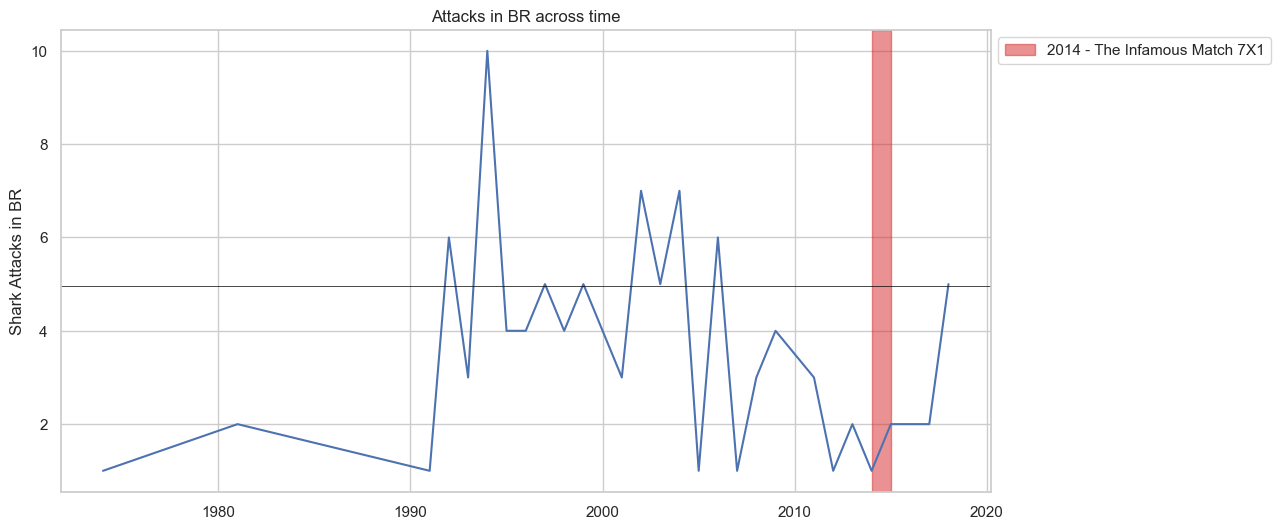

In [188]:
plt.plot(df_BR['Year'], df_BR["Year_counts"])


#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.legend(bbox_to_anchor=(1, 1))
#Identify treshhold (median) to check for success criteria
plt.axhline(y=4.96, xmin=0, xmax=2022, c='black', linewidth=0.5)

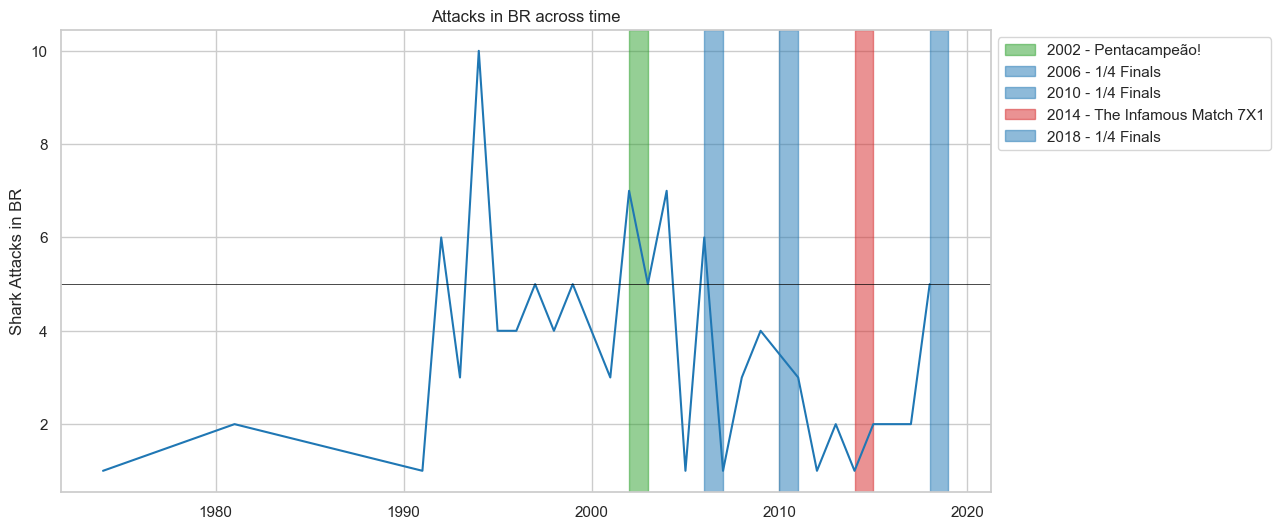

In [182]:

#sns.lineplot(data=df_BR, x='Year', y='Year_counts')

plt.plot(df_BR['Year'], df_BR["Year_counts"], color='tab:blue')



#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2002,2003, color='tab:green', alpha=0.5, label="2002 - Pentacampeão!")
plt.axvspan(2006,2007, color='tab:blue', alpha=0.5, label="2006 - 1/4 Finals")
plt.axvspan(2010,2011, color='tab:blue', alpha=0.5, label="2010 - 1/4 Finals")
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.axvspan(2018,2019, color='tab:blue', alpha=0.5, label="2018 - 1/4 Finals")


plt.legend(bbox_to_anchor=(1, 1))
#Identify treshhold (median) to check for success criteria
plt.axhline(y=5, xmin=0, xmax=2022, c='black', linewidth=0.5)



### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that _Brazilian_ sharks do not react negatively when Brazil loses in the World Cup at all, with numbers during those periods being in an all time low. 

In fact, the overall rise of the 'angryness factor' on the years leading to the World Cud could indicate that _Brazilian_ _sharks_ are are generally against the Bread and Circus politics surrounding the sport. Qualitative data (e.g. interview with the sharks), is needed for further analysis on that subject. 


## <span style="color:darkslategrey"> Q: How angry were the _Brazilian_ sharks that did attack? </span>




In [104]:
df_BR2 = df_BR.loc[(df_BR['Year'] == 2002) | (df_BR['Year'] == 2006) | (df_BR['Year'] == 2010) | (df_BR['Year'] == 2014) | (df_BR['Year'] == 2018) & (df_BR['Type'] != "Invalid"), ['Type','Year', "Fatal"]]

df_BR2['Type'].dropna(inplace=True)

Text(2.7, 3.5, '*No provoked attacks registered')

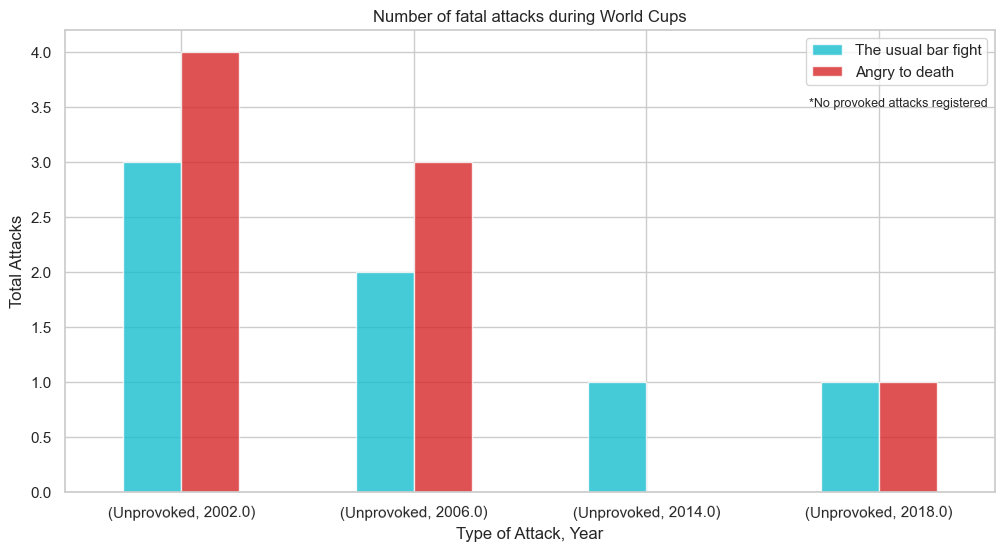

In [190]:
df_BR2.groupby(['Type', 'Year', 'Fatal'])['Fatal'].count().unstack().plot(kind='bar', title="Number of fatal attacks during World Cups", color=['tab:cyan', 'tab:red'], alpha=0.8)

#df_BR2.groupby(['Year'])['Fatal', 'Type'].count().unstack().plot(kind='bar', color=['yellow', 'red'])

legend_labels = ["The usual bar fight", 'Angry to death']

plt.legend(labels=legend_labels)
plt.xticks(rotation=0.5)
plt.ylabel("Total Attacks")
plt.xlabel("Type of Attack, Year")
# place a text box in upper left in axes coords
plt.text(2.7, 3.5, '*No provoked attacks registered',fontsize=9)


### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that most fatal attacks happened when Brazil won the worldcup which is leading this researcher to believe that perhaps this is actually how sharks celebrate the world cup. Further research is required to understand sharks customs regarding sports. 






## <span style="color:darkslategrey"> Q: What was the "Angryness Factor" sharks from countries that made it to the finals? </span>

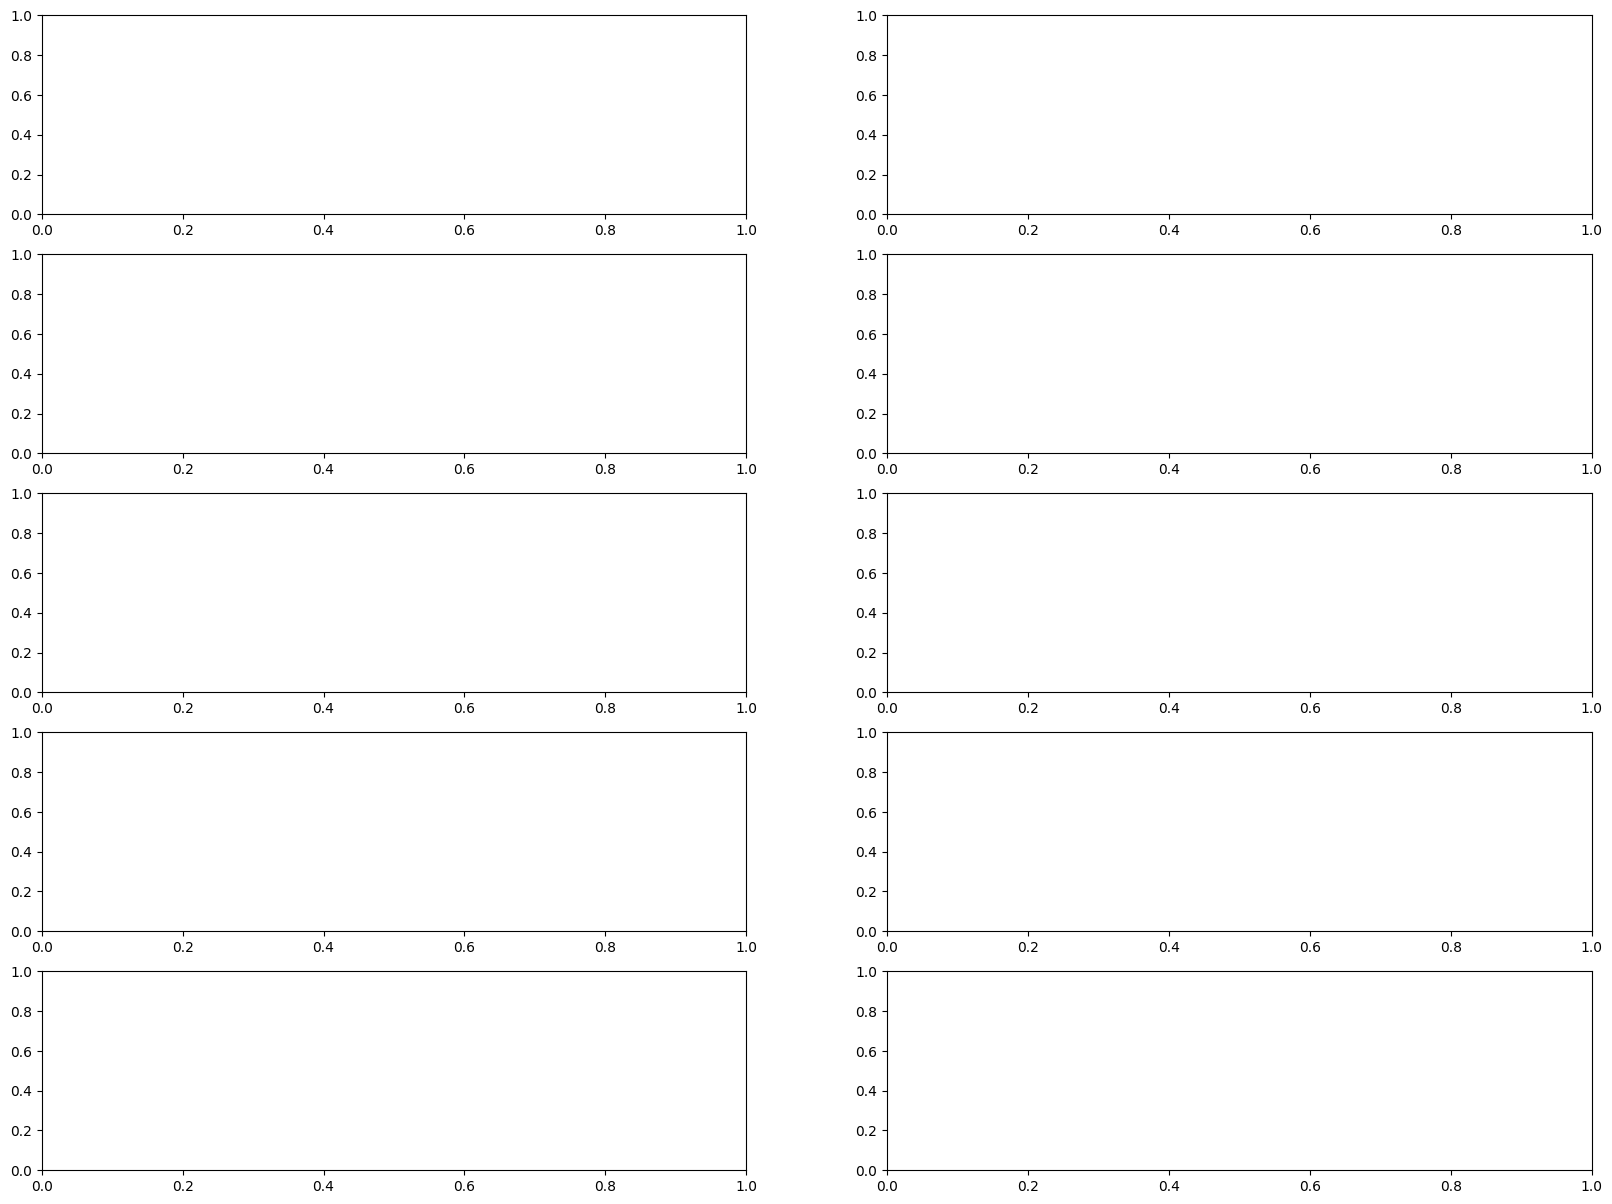

In [25]:
# Create figure and axes [row,column]

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,15))

In [189]:
warnings.filterwarnings("ignore")

In [191]:
country_ = ['France', 'Croatia', 'Germany', 'Argentina', 'Spain', 'Netherlands', 'Italy', 'France', 'Brazil', 'Germany']
years_ = [2018, 2014, 2010, 2016, 2002]

In [211]:
df_global = df[df['Country'].isin(country_)]
df_global['Country'].value_counts()

Brazil       112
Italy         71
Spain         44
Croatia       34
France        13
Argentina      1
Name: Country, dtype: int64

In [218]:
#df_global2 = df_global[(df_global['Year'] == 2002) | (df_global['Year'] == 2006) | (df_global['Year'] == 2010) | (df_global['Year'] == 2014) | (df_global['Year'] == 2018), 'Country']


In [227]:
df_BR2 = df_BR.loc[(df_BR['Year'] == 2002) | (df_BR['Year'] == 2006) | (df_BR['Year'] == 2010) | (df_BR['Year'] == 2014) | (df_BR['Year'] == 2018) & (df_BR['Type'] != "Invalid"), ['Type','Year', "Fatal"]]


,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
4568,4569,1947.10.10,10-Oct-1947,1970-01-01 00:00:00.000001947,Unprovoked,Brazil,Pernambuco,Piedade,Swimming,Father Serafin de Oliveira,...,NaN,"JC Online, 6/25/2012",1947.10.10-Serafim.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1947.10.10,1947.10.10,1734.0,NaN,NaN
3344,3345,1972.00.00.b,1972,1970-01-01 00:00:00.000001972,Unprovoked,France,Antibes,NaN,Swimming,NaN,...,White shark,C. Moore. GSAF,1972.00.00.b-Antibes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1972.00.00.b,1972.00.00.b,2958.0,NaN,NaN
5162,5163,1925.09.04,04-Sep-1925,1970-01-01 00:00:00.000001925,Provoked,Spain,Valencia,Valencia,Fishing,Pascual Gurran,...,NaN,C. Moore. GSAF,1925.09.04-Gurren-Valencia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1925.09.04,1925.09.04,1140.0,NaN,NaN
2791,2792,1987.00.00.a,1987,1970-01-01 00:00:00.000001987,Boat,Italy,Tyrrhenian Sea,"Marciana Marina, Isola d'Elba",Boat,Aniello Mattera and Giorgio Allori,...,White shark,"A. De Maddalena; Perfetti (1989), M. Zuffa (pe...",1987.00.00.a-boat-Mattera-Allori.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1987.00.00.a,1987.00.00.a,3511.0,NaN,NaN
3879,3880,1961.09.02.R,Reported 06-Sep-1961,1970-01-01 00:00:00.000001961,Provoked,Italy,Venice Province,Chioggia,Fishing,Pollione Perrini & Fioravante Perini,...,1 m shark,"C. Moore, GSAF",1961.09.06.R-Chioggia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"1961.09,06.R",1961.09.02.R,2423.0,NaN,NaN
6157,6159,1721.06.00,June 1721,1970-01-01 00:00:00.000001721,Unprovoked,Italy,Sardinia,"Ponte della Maddelena,",Swimming,male,...,"White shark, 1600-lb female",F. Ricciardi; A. De Maddalena.,1721.06.00-Maddalena.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1721.06.00,1721.06.00,144.0,NaN,NaN
5678,5679,1892.06.24,24-Jun-1892,1970-01-01 00:00:00.000001892,Invalid,France,Brittany,Brest,Fishing boat,NaN,...,Invalid,"C.Moore, GSAF",1892.06.24-Brest.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1892.06.24,1892.06.24,624.0,NaN,NaN
3560,3561,1966.08.16,16-Aug-1966,1970-01-01 00:00:00.000001966,Unprovoked,Croatia,Primorje-Gorski Kotar County,Bakar,Swimming,Josef Treliac,...,White shark,"R. Rocconi; A. De Maddalena & C. Moore, GSAF",1966.08.16-Treliac.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1966.08.16,1966.08.16,2742.0,NaN,NaN
1778,1779,2003.04.25,25-Apr-2003,1970-01-01 00:00:00.000002003,Unprovoked,Brazil,Rio de Janeiro,"Copacabana Beach, Rio de Janiero",Swimming,Felipe Tavares Marinho,...,NaN,Web ProWire,2003.04.25-Marinho.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2003.04.25,2003.04.25,4524.0,NaN,NaN
1642,1643,2004.08.21,21-Aug-2004,1970-01-01 00:00:00.000002004,Unprovoked,Brazil,Pernambuco,"Boa Viagem Beach, Recife",Bathing,Wagner da Silva,...,"Tiger shark, 1.5 m","P. M. Lopes, GSAF, 8/22/2004",2004.08.21-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.08.21,2004.08.21,4660.0,NaN,NaN


In [ ]:
plt.plot(df_BR['Year'], df_BR["Year_counts"])


#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.legend(bbox_to_anchor=(1, 1))
#Identify treshhold (median) to check for success criteria
plt.axhline(y=4.96, xmin=0, xmax=2022, c='black', linewidth=0.5)

In [ ]:
#df_index = df[["Country", "Year"]].groupby(by=["Country", "Year"]).agg({'Year':'sum'})

#df_index = pd.crosstab(df["Year"], df["Country"]) # count
#pivot_df = pd.crosstab(df.Year,df.Country,values=df.Value,aggfunc='sum')

In [ ]:
#df['Country'].value_counts()

In [ ]:
df['Year'] = pd.to_datetime(df['Year'])
df.Year = pd.to_datetime(df.Year).dt.year
df.head()

In [ ]:
pivot_df.head()

In [ ]:
# use crosstab to pivot the dataframe
pivot_df = pd.crosstab(df.Year, df.Country)

# Plot the data for a specific country
plt.plot(pivot_df.index, pivot_df)

# Add labels and title
#plt.xlabel('Year')
#plt.ylabel('Occurrences')
#plt.title('Occurrences by Year for Germany')

# Show the plot
#plt.show()



In [ ]:
df_index.sample(5)